# Data Cleaning & Preprocessing
Dataset: Airbnb NYC Analysis

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# Plot style features
sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (8, 5)

In [3]:
# Load data, count and remove duplicates
df = pd.read_csv('AB_NYC_2019.csv')
# Initial info about data
print("Dataset shape:", df.shape)
df.info()
df.head()

Dataset shape: (48895, 16)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [4]:
# drop duplicates
df.drop_duplicates(inplace=True)
print("Shape after removing duplicates:", df.shape)

Shape after removing duplicates: (48895, 16)


In [5]:
# handling missing values / count NA values in data frame
# Filling missing reviews_per_month with 0
df['reviews_per_month'].fillna(0, inplace=True)
# last_review remains NaT for missing
df['last_review'] = pd.to_datetime(df['last_review'], errors='coerce')
# Verifing missing values
df.isna().sum()

C:\Users\karim\AppData\Local\Temp\ipykernel_8576\1646390038.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['reviews_per_month'].fillna(0, inplace=True)


id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                     0
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [6]:
# standardize text data in neighbourhood_group column
df['neighbourhood_group'] = df['neighbourhood_group'].str.lower()
# Drop listings with price <= 0
df = df[df['price'] > 0]

# Exploratory Data Analysis (EDA) 

In [8]:
# Outlier check: prices are often skewed; inspect extreme values
df['price'].describe(percentiles=[0.01,0.25,0.5,0.75,0.99])

count    48884.000000
mean       152.755053
std        240.170260
min         10.000000
1%          30.000000
25%         69.000000
50%        106.000000
75%        175.000000
99%        799.000000
max      10000.000000
Name: price, dtype: float64

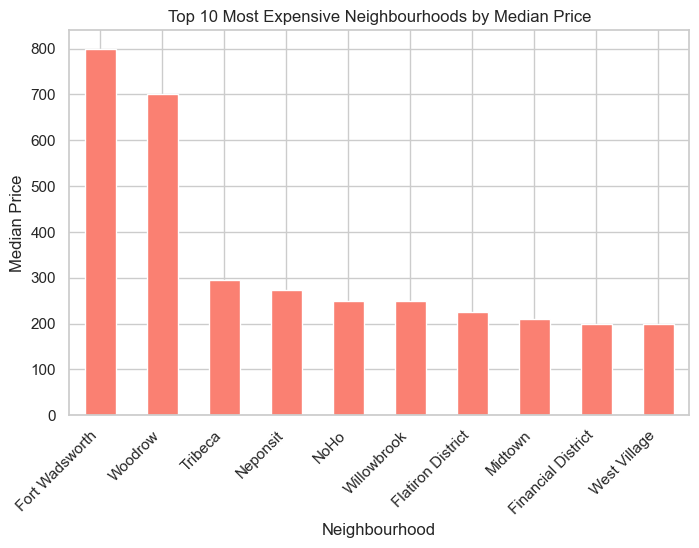

In [9]:
# Find the top 10 most expensive neighbourhoods by median price. 
top_neighbourhood = df.groupby('neighbourhood')['price'].median().sort_values(ascending=False).head(10)
top_neighbourhood.plot(x='neighbourhood', y='price', kind='bar', color='salmon')
plt.ylabel("Median Price")
plt.xlabel("Neighbourhood")
plt.title("Top 10 Most Expensive Neighbourhoods by Median Price")
plt.xticks(rotation=45, ha='right')
plt.show()

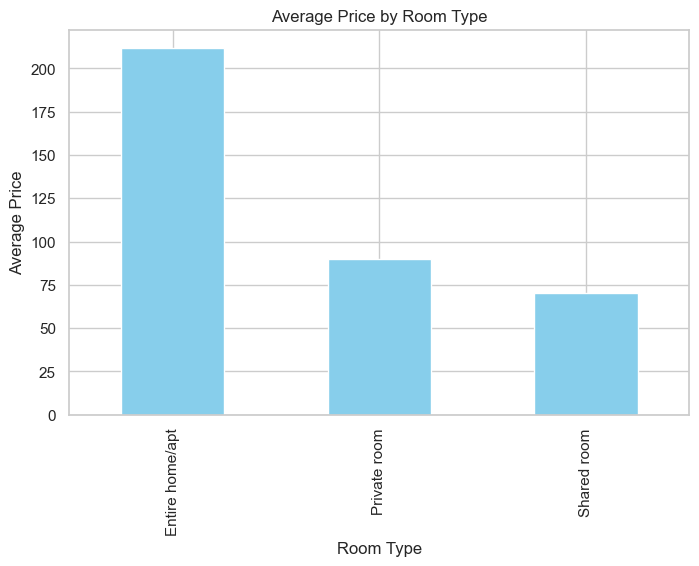

In [10]:
# Calculate the average price for each room_type
avg_room_price = df.groupby('room_type')['price'].mean().round(2)
avg_room_price.plot(kind='bar', color='skyblue')
plt.ylabel("Average Price")
plt.xlabel("Room Type")
plt.title("Average Price by Room Type")
plt.show()

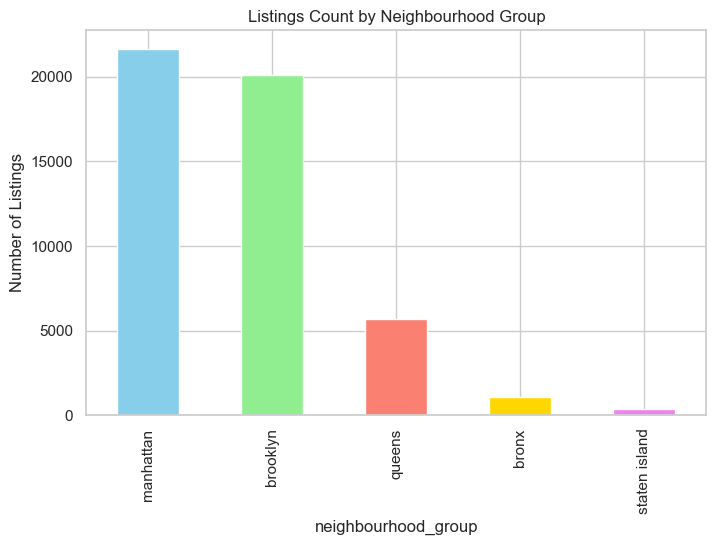

In [11]:
# Count listings per neighbourhood_group. 
count_group = df['neighbourhood_group'].value_counts()
count_group.plot(kind='bar', color=['skyblue','lightgreen','salmon','gold','violet'])
plt.title("Listings Count by Neighbourhood Group")
plt.ylabel("Number of Listings")
plt.show()

In [12]:
# Group by neighbourhood_group and compute:average,median price,total number of listings,average availability (availability_365)
group_neighb = df.groupby('neighbourhood_group')['price'].agg(['mean','median']).round(2)
print(group_neighb,end='\n\n')

count_group = df.groupby('neighbourhood_group')['neighbourhood_group'].count().sort_values(ascending=False)
print(count_group,end='\n\n')

most_common = df.groupby('neighbourhood_group')['availability_365'].mean().round(2)
print(most_common)

                       mean  median
neighbourhood_group                
bronx                 87.58    65.0
brooklyn             124.44    90.0
manhattan            196.88   150.0
queens                99.52    75.0
staten island        114.81    75.0

neighbourhood_group
manhattan        21660
brooklyn         20095
queens            5666
bronx             1090
staten island      373
Name: neighbourhood_group, dtype: int64

neighbourhood_group
bronx            165.79
brooklyn         100.22
manhattan        111.98
queens           144.45
staten island    199.68
Name: availability_365, dtype: float64


In [13]:
# Identify the top 10 hosts by total number of listings.
group_by_id = df.groupby('name')['calculated_host_listings_count'].count().sort_values(ascending=False).head(10)
print(group_by_id)

name
Hillside Hotel                                18
Home away from home                           17
New york Multi-unit building                  16
Brooklyn Apartment                            12
Loft Suite @ The Box House Hotel              11
Private Room                                  11
Artsy Private BR in Fort Greene Cumberland    10
Private room                                  10
Private room in Williamsburg                   8
Beautiful Brooklyn Brownstone                  8
Name: calculated_host_listings_count, dtype: int64


In [14]:
# For each neighbourhood_group, find the most common room_type.
room_type = df.groupby('neighbourhood_group')['room_type'].value_counts().groupby(level=0).idxmax()
print(room_type)

neighbourhood_group
bronx                    (bronx, Private room)
brooklyn              (brooklyn, Private room)
manhattan         (manhattan, Entire home/apt)
queens                  (queens, Private room)
staten island    (staten island, Private room)
Name: count, dtype: object


# Feature Engineering  


In [16]:
# Create a new column: price_per_min_night = price / minimum_nights. 
df['price_per_min_night'] = df['price'] / df['minimum_nights'].replace(0,1)

In [25]:
# Create a boolean column: is_popular = number_of_reviews > 50.
df['is_popular'] = (df['number_of_reviews'] > 50).map({True: "Yes", False: "No"})

In [27]:
# Create an availability category column: "high" if availability > 200 "medium" if 100–200 "low" otherwise
conditions = [(df['availability_365'] > 200), ((df['availability_365'] > 100) & (df['availability_365'] < 200)), (df['availability_365'] < 100)]
assigned_result = ['high','medium','low']
df['availability_demand'] = np.select(conditions,assigned_result)

In [29]:
# Create a column indicating if the listing was reviewed in the last 365 days. last review date 2019-07-08
end_date = pd.to_datetime("2019-08-01")
df['days_since_last_review'] = (end_date - df['last_review']).dt.days
df['reviews_in_365'] = df['days_since_last_review'].apply(lambda x: 'In last 365 days' if 0 < x <= 365 else 'More than 365 or never')

In [31]:
# Create a mini table with average prices by neighbourhood,merge it back to the original main DataFrame
avg_price = df.groupby("neighbourhood_group")["price"].mean().round(2).reset_index().rename(columns={"price": "avg_price"})
df = df.merge(avg_price,on='neighbourhood_group',how='left')
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,...,last_review,reviews_per_month,calculated_host_listings_count,availability_365,price_per_min_night,is_popular,availability_demand,days_since_last_review,reviews_in_365,avg_price
0,2539,Clean & quiet apt home by the park,2787,John,brooklyn,Kensington,40.64749,-73.97237,Private room,149,...,2018-10-19,0.21,6,365,149.0,No,high,286.0,In last 365 days,124.44
1,2595,Skylit Midtown Castle,2845,Jennifer,manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,...,2019-05-21,0.38,2,355,225.0,No,high,72.0,In last 365 days,196.88
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,manhattan,Harlem,40.80902,-73.94190,Private room,150,...,NaT,0.00,1,365,50.0,No,high,NaN,More than 365 or never,196.88
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,...,2019-07-05,4.64,1,194,89.0,Yes,medium,27.0,In last 365 days,124.44
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,...,2018-11-19,0.10,1,0,8.0,No,low,255.0,In last 365 days,196.88


In [33]:
# Filter listings that: cost above neighbourhood average, have availability < 50, are in Manhattan or Brooklyn
filtered_listings = df[(df['price'] > df['avg_price']) & (df['availability_365'] < 50) & (df['neighbourhood_group'].isin(['manhattan', 'brooklyn']))]
filtered_listings[['name','neighbourhood_group','price','availability_365']]

,name,neighbourhood_group,price,availability_365
15,Only 2 stops to Manhattan studio,brooklyn,140,46
20,Sweet and Spacious Brooklyn Loft,brooklyn,299,0
55,Williamsburg 1 bedroom Apartment,brooklyn,150,30
66,Light-filled 2B duplex in the heart of Park Sl...,brooklyn,225,0
83,"Sunny, Spacious Top Floor Haven",brooklyn,130,38
...,...,...,...,...
48803,Midtown bedroom in Manhattan,manhattan,200,34
48819,"LUXURY, PRIVATE APT ACROSS FROM EMPIRE STATE",manhattan,199,14
48828,Massage Spa. Stay overnight. Authors Artist dr...,brooklyn,800,23
48831,LUXURY MANHATTAN PENTHOUSE+HUDSON RIVER+EMPIRE...,manhattan,350,9


# Correlation & Numerical Relationships 

In [36]:
# Compute the correlation matrix for features: ['price', 'number_of_reviews', 'reviews_per_month', 'availability_365'] 
corr_matrix = np.corrcoef(df[['price', 'number_of_reviews', 'reviews_per_month', 'availability_365']].T)
corr_matrix

array([[ 1.        , -0.04792567, -0.05053055,  0.0818475 ],
       [-0.04792567,  1.        ,  0.58931124,  0.17197494],
       [-0.05053055,  0.58931124,  1.        ,  0.16366375],
       [ 0.0818475 ,  0.17197494,  0.16366375,  1.        ]])

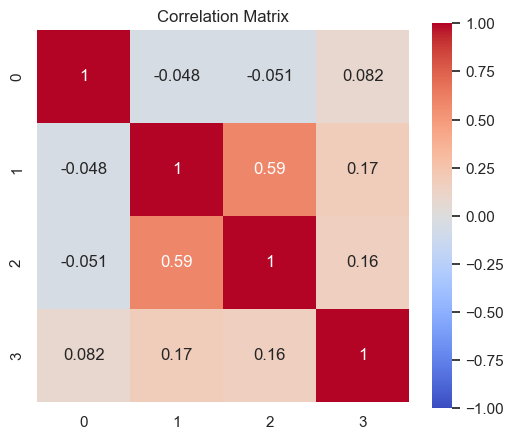

In [38]:
# Plot for correlation matrix,strongest relationship have two columns:number_of_reviews and reviews_per_months, due to both measuring similar behavior
plt.figure(figsize=(6,5))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", vmin=-1, vmax=1, square=True)
plt.title("Correlation Matrix")
plt.show()